In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import PIL 

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
        'dataset/training',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
        'dataset/training',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')
test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 748 images belonging to 3 classes.
Found 186 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [3]:
sample_batch_input,sample_batch_labels = train_generator.next()
print(sample_batch_input.shape,sample_batch_labels.shape)

(32, 150, 150, 3) (32, 3)


In [4]:
sample_batch_input,sample_batch_labels = validation_generator.next()
print(sample_batch_input.shape,sample_batch_labels.shape)

(32, 150, 150, 3) (32, 3)


In [5]:
sample_batch_input,sample_batch_labels = test_generator.next()
print(sample_batch_input.shape,sample_batch_labels.shape)

(32, 150, 150, 3) (32, 3)


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(150, 150, 3)))
model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(8, 3, strides=2, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
    )

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 74, 74, 8)         224       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 18, 18, 8)         584       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 9, 9, 8)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 648)               0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [35]:
model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/24 [===========================>..] - ETA: 0s - loss: 1.0936 - accuracy: 0.3967WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd143e71680> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/24 [==============================] - 3s 106ms/step - loss: 1.0932 - accuracy: 0.3997 - val_loss: 1.0952 - val_accuracy: 0.3600
Epoch 2/20
24/24 [==============================] - 2s 96ms/step - loss: 1.0646 - accuracy: 0.4773 - val_loss: 1.1176 - val_accuracy: 0.3333
Epoch 3/20
24/24 [==============================] - 2s 94ms/step - loss: 1.0297 - accuracy: 0.4813 - val_loss: 1.0907 - val_accuracy: 0.3900
Epoch 4/20
24/24 [==============================] - 2s 93ms/step - loss: 0.9403 - accuracy: 0.5949 - val_loss: 1.1298 - val_accuracy: 0.3633
Epoch 5/20
24/24 [==============================] - 2s 94ms/step - loss: 0.7984 - accuracy: 0.6738 - val_loss: 1.1590 - val_accuracy: 0

In [36]:
model.evaluate(validation_generator)

6/6 [==============================] - 0s 57ms/step - loss: 1.1059 - accuracy: 0.6452


[1.1058595180511475, 0.6451612710952759]

In [52]:
model.save('model_th')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: model_th/assets


INFO:tensorflow:Assets written to: model_th/assets


In [53]:
# load the model to check if saving worked

new_model = tf.keras.models.load_model('model_th')
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 74, 74, 8)         224       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 18, 18, 8)         584       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 9, 9, 8)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 648)               0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [55]:
# generate a list of class names from the class_indices from the image generator
class_map = train_generator.class_indices

classes = []
for key in class_map.keys():
    classes.append(key)

In [56]:
classes

['perfect', 'shoo', 'what']

In [57]:
def load_image(filename):
        
    img = tf.keras.utils.load_img(filename, target_size=(150,150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    return img_array, img_processed

1/1 [==============================] - 0s 20ms/step


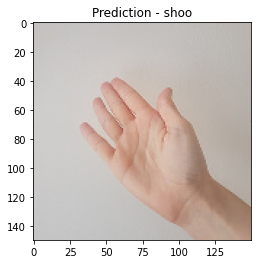

In [58]:
plot_image, image = load_image('images/shoo.jpg')

prediction = model.predict(image)
index = np.argmax(prediction)

plt.title(f'Prediction - {classes[index]}')
plt.imshow(plot_image)

1/1 [==============================] - 0s 15ms/step


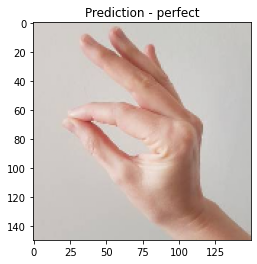

In [59]:
plot_image, image = load_image('images/perfect.jpg')

prediction = model.predict(image)
index = np.argmax(prediction)

plt.title(f'Prediction - {classes[index]}')
plt.imshow(plot_image)

1/1 [==============================] - 0s 16ms/step


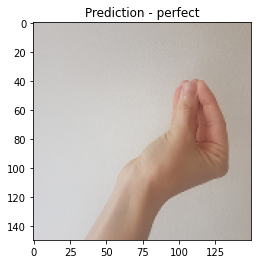

In [60]:
plot_image, image = load_image('images/what.jpg')

prediction = model.predict(image)
index = np.argmax(prediction)

plt.title(f'Prediction - {classes[index]}')
plt.imshow(plot_image)

In [61]:
def confusion_ma(y_true, y_pred, class_names):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_true, y_pred, normalize=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.savefig('confusion_matrix.jpg', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()
    return plt.show()

In [62]:
class_map = train_generator.class_indices

classes = []
for key in class_map.keys():
    classes.append(key)

In [63]:
Y_pred = model.predict(test_generator, verbose = True)
y_pred = np.argmax(Y_pred, axis=1)

10/10 [==============================] - 1s 103ms/step


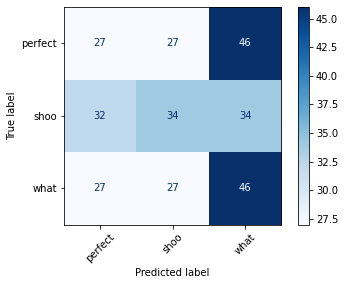

In [64]:
confusion_ma(test_generator.classes, y_pred, classes)